# **1. Import Drive**

In [1]:
from google.colab import drive

**Mount the drive**

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# **2. Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# **3. Data pre-processing**

In [4]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Advertising.csv')

In [5]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 5)

In [8]:
df.size

1000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
#unique values of each columns
objects_cols=['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']
for i in objects_cols:
  print("column name:{}".format(i))
  print("Number of unique columns of",i,":{}".format(df[i].nunique()))
  print("------------------------------------------------------------------------")

column name:Unnamed: 0
Number of unique columns of Unnamed: 0 :200
------------------------------------------------------------------------
column name:TV
Number of unique columns of TV :190
------------------------------------------------------------------------
column name:Radio
Number of unique columns of Radio :167
------------------------------------------------------------------------
column name:Newspaper
Number of unique columns of Newspaper :172
------------------------------------------------------------------------
column name:Sales
Number of unique columns of Sales :121
------------------------------------------------------------------------


**3.1. Missing Values**

In [13]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

No missing Values.

In [14]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [15]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# **4.Data Visualization**

In [17]:
#import Plotly Express
import plotly.express as px

# Sales on TV Adverstisment

In [18]:
fig = px.bar(df,x='Sales',y='TV',color='Sales',title='Sales on TV advertisments',template='xgridoff',width=1000,height=700)
fig.show()

In [19]:
fig = px.scatter(df, x='Sales',y='Radio',color='Sales',
            title='Sales On Radio Advertisments', width=800, height=400,template='presentation')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

In [20]:
fig = px.scatter(df, x='Sales',y='Newspaper',color='Sales',
            title='Sales On Newspaper Advertisments', width=800, height=400,template='presentation',marginal_x="histogram", marginal_y="rug")


fig.show()

In [21]:
fig = px.scatter(df, x="Radio", y="TV", color="Sales",
                 size='Newspaper',title='Sales On Advertisments')
fig.show()

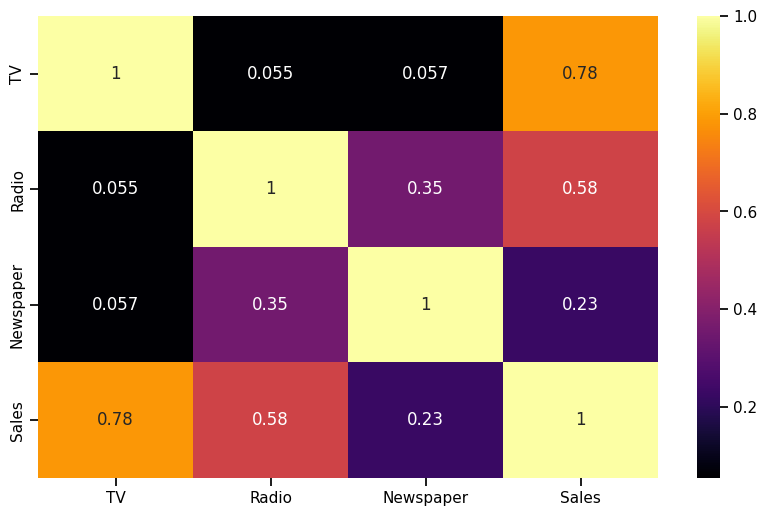

In [22]:
heat_maps = df[[ 'TV', 'Radio', 'Newspaper', 'Sales']]
heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='inferno');

# **5. train_test_split**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(labels=["Sales"],axis=1) # Features
y = df["Sales"] # Target

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=42,test_size=0.2,shuffle=True)

In [26]:
df.shape

(200, 4)

In [27]:
X_train.shape

(160, 3)

In [28]:
y_train.shape

(160,)

# **6.Model Implementation and Evaluation**

**Multiple Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
#Accuracy
reg.score(X_test,y_test)

0.899438024100912

In [32]:
#testing the model
y_predicted = reg.predict(X_test)
y_predicted

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

**Model Evaluation**

In [33]:
from sklearn.metrics import mean_absolute_error as mae

# Mean absolute Error

In [34]:
y_mean=y_train.mean()
print(y_mean)
#baseline error
y_pred_baseline=[y_mean]*len(y_train)
print(y_pred_baseline[:5])
#Mean Absolute Error
mae_baseline=mae(y_train,y_pred_baseline)
print(mae_baseline)

14.1
[14.1, 14.1, 14.1, 14.1, 14.1]
4.12


In [35]:
#Mean Absolute error on Prediction
mae(y_train,reg.predict(X_train))

1.1984678961500137

In [36]:
#Mean absolute Error on test data
mae(y_test,y_predicted)

1.4607567168117603

Intercept

---



In [37]:
intercept=reg.intercept_
intercept

2.979067338122629

Coefficient

---



In [38]:
coefficient=reg.coef_
coefficient

array([0.04472952, 0.18919505, 0.00276111])

**Actual Vs Prediction [Training Dataset]**

---



In [39]:
fig = px.scatter(x=y_train, y=reg.predict(X_train),template='plotly_dark')
fig.show()

**Actual Vs Prediction [Testing Dataset]**

---



In [40]:
fig = px.scatter(x=y_test, y=y_predicted,template='plotly_dark')
fig.show()

In [41]:
#predicted values
predicted_df=pd.DataFrame({"Actual":y_test,"Predicted":y_predicted})
predicted_df.head(5)

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
